#  Network Analysis Assignment 


Name - Debanjan Das, Student ID - 17202833

In [1]:
import json, itertools
import networkx as nx
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Data Parsing

Reading all the data from list_members jsonl file and storing it in a dataframe df.

In [2]:
# read in the JSONL text
users = []
fin = open("list_members.jsonl","r")
# process each line as a separate JSON document
for line in fin.readlines():
    user = json.loads( line )
    users.append( user )
fin.close()
print("Read %d user profiles" % len(users))

Read 27 user profiles


In [3]:
df = pd.DataFrame( users )
df.head(5)

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,275686563,275686563,The Verge,verge,New York,https://t.co/W2SFxIXkC4 covers life in the fut...,http://t.co/W2SFxIXkC4,{'url': {'urls': [{'url': 'http://t.co/W2SFxIX...,False,2630131,...,EFEFEF,333333,True,False,False,False,False,False,False,regular
1,112243365,112243365,FutureShift,futureshift,,Tech news from @Mashable. Obsessed w/ the inno...,http://t.co/A9lFsRN2e7,{'url': {'urls': [{'url': 'http://t.co/A9lFsRN...,False,663724,...,DDEEF6,333333,False,False,False,False,False,False,False,none
2,60642052,60642052,VentureBeat,VentureBeat,San Francisco + NYC,Obsessed with covering transformative technology.,http://t.co/vNmL0zJnXy,{'url': {'urls': [{'url': 'http://t.co/vNmL0zJ...,False,712445,...,F1F1F1,333333,True,False,False,False,False,False,False,none
3,30261067,30261067,CNET,CNET,San Francisco,CNET is the place to find out what's happening...,https://t.co/SSA14X2cTK,{'url': {'urls': [{'url': 'https://t.co/SSA14X...,False,1703619,...,DDDDDD,404040,True,False,False,False,False,False,False,regular
4,28172926,28172926,WSJ Tech,WSJTech,Global,The Wall Street Journal's (@WSJ) home for glob...,https://t.co/JKHdNW8MeT,{'url': {'urls': [{'url': 'https://t.co/JKHdNW...,False,319142,...,EFEFEF,333333,True,False,False,False,False,False,False,none


In [4]:
df["screen_name"] = df["screen_name"].str.lower() # Changing the entire screen name to lowercase.
df = df.set_index("name") # Setting the index as name
df.head(3)

,id,id_str,screen_name,location,description,url,entities,protected,followers_count,friends_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
name,,,,,,,,,,,,,,,,,,,,,
The Verge,275686563,275686563,verge,New York,https://t.co/W2SFxIXkC4 covers life in the fut...,http://t.co/W2SFxIXkC4,{'url': {'urls': [{'url': 'http://t.co/W2SFxIX...,False,2630131,166,...,EFEFEF,333333,True,False,False,False,False,False,False,regular
FutureShift,112243365,112243365,futureshift,,Tech news from @Mashable. Obsessed w/ the inno...,http://t.co/A9lFsRN2e7,{'url': {'urls': [{'url': 'http://t.co/A9lFsRN...,False,663724,56,...,DDEEF6,333333,False,False,False,False,False,False,False,none
VentureBeat,60642052,60642052,venturebeat,San Francisco + NYC,Obsessed with covering transformative technology.,http://t.co/vNmL0zJnXy,{'url': {'urls': [{'url': 'http://t.co/vNmL0zJ...,False,712445,1557,...,F1F1F1,333333,True,False,False,False,False,False,False,none


In [5]:
df.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'entities', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang',
       'status', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_banner_url', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'follow_request_sent', 'notifications', 'translator_type'],
      dtype='object')

In [6]:
df = df.drop( ['id_str',
        'contributors_enabled',
        'default_profile',
        'default_profile_image',
        'entities',
        'follow_request_sent',
        'following',
        'has_extended_profile',
        'is_translation_enabled',
        'is_translator',
        'translator_type',
        'lang',
        'notifications',
        'profile_background_color',
        'profile_background_tile',
        'profile_banner_url',
        'profile_image_url',
        'profile_image_url_https',
        'profile_link_color',
        'profile_sidebar_border_color',
        'profile_sidebar_fill_color',
        'profile_text_color',
        'profile_background_image_url',
        'profile_background_image_url_https',
        'profile_use_background_image',
        'time_zone',
        'url',
        'utc_offset'], axis=1 )        # Dropping all extra columns 

In [7]:
df.columns

Index(['id', 'screen_name', 'location', 'description', 'protected',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'geo_enabled', 'verified', 'statuses_count',
       'status'],
      dtype='object')

In [8]:
df.head()

,id,screen_name,location,description,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,status
name,,,,,,,,,,,,,,
The Verge,275686563,verge,New York,https://t.co/W2SFxIXkC4 covers life in the fut...,False,2630131,166,37322,Fri Apr 01 19:54:22 +0000 2011,1446,True,True,170342,{'created_at': 'Thu Feb 20 15:34:28 +0000 2020...
FutureShift,112243365,futureshift,,Tech news from @Mashable. Obsessed w/ the inno...,False,663724,56,14879,Sun Feb 07 19:30:47 +0000 2010,1211,True,True,49820,{'created_at': 'Thu Feb 20 15:20:45 +0000 2020...
VentureBeat,60642052,venturebeat,San Francisco + NYC,Obsessed with covering transformative technology.,False,712445,1557,19538,Mon Jul 27 16:34:47 +0000 2009,1211,True,True,149032,{'created_at': 'Thu Feb 20 14:41:37 +0000 2020...
CNET,30261067,cnet,San Francisco,CNET is the place to find out what's happening...,False,1703619,389,27350,Fri Apr 10 17:10:53 +0000 2009,3450,True,True,252387,{'created_at': 'Thu Feb 20 15:32:36 +0000 2020...
WSJ Tech,28172926,wsjtech,Global,The Wall Street Journal's (@WSJ) home for glob...,False,319142,100,9236,Wed Apr 01 19:23:56 +0000 2009,117,False,True,51037,{'created_at': 'Wed Feb 19 21:20:26 +0000 2020...


In [9]:
from datetime import datetime
from email.utils import parsedate

def parse_twitter_date( s ):
    parts = parsedate(s)
    return datetime(*(parts[:6]))

In [10]:
for i, d in df["created_at"].iteritems():
    df.loc[i, "created_at"] = parse_twitter_date( d )

In [11]:
# process each row
for i, status in df["status"].iteritems():
    # parse the date here too
    df.loc[i, "last_tweet_date"] = parse_twitter_date( status["created_at"] )
    df.loc[i, "last_tweet"] = status["text"]
# drop the column when we are finished
df = df.drop( ['status'], axis=1)

In [12]:
df.head(5)

,id,screen_name,location,description,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,last_tweet_date,last_tweet
name,,,,,,,,,,,,,,,
The Verge,275686563,verge,New York,https://t.co/W2SFxIXkC4 covers life in the fut...,False,2630131,166,37322,2011-04-01 19:54:22,1446,True,True,170342,2020-02-20 15:34:28,T-Mobile’s OnePlus 7T Pro 5G McLaren is gettin...
FutureShift,112243365,futureshift,,Tech news from @Mashable. Obsessed w/ the inno...,False,663724,56,14879,2010-02-07 19:30:47,1211,True,True,49820,2020-02-20 15:20:45,"Say hello to the Vive Cosmos Play, Vive Cosmos..."
VentureBeat,60642052,venturebeat,San Francisco + NYC,Obsessed with covering transformative technology.,False,712445,1557,19538,2009-07-27 16:34:47,1211,True,True,149032,2020-02-20 14:41:37,Animal Crossing: New Horizons can recover a lo...
CNET,30261067,cnet,San Francisco,CNET is the place to find out what's happening...,False,1703619,389,27350,2009-04-10 17:10:53,3450,True,True,252387,2020-02-20 15:32:36,"With ElectionGuard, Microsoft hopes to make ha..."
WSJ Tech,28172926,wsjtech,Global,The Wall Street Journal's (@WSJ) home for glob...,False,319142,100,9236,2009-04-01 19:23:56,117,False,True,51037,2020-02-19 21:20:26,American tech giants will face new restriction...


# Playing Around The Twitter Data

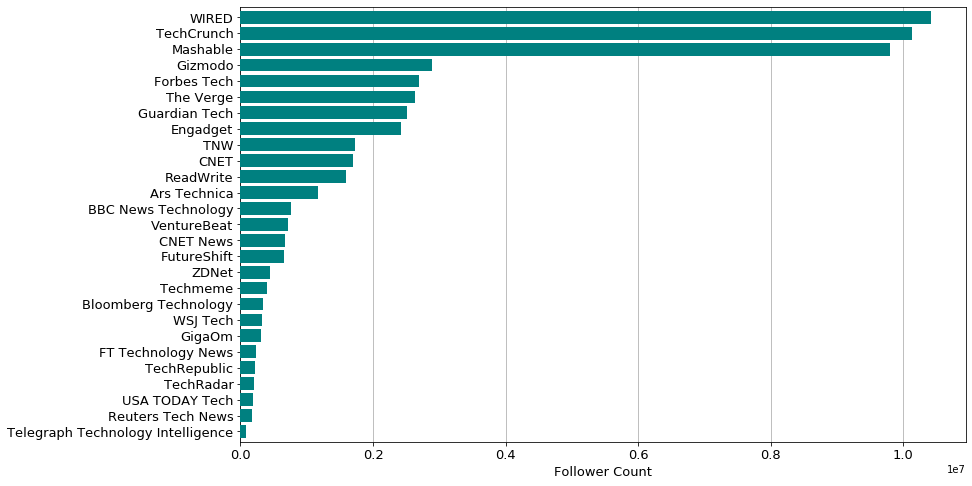

In [13]:
# get a sorted list by followers
follower_counts = df["followers_count"].sort_values()
# draw the plot
ax = follower_counts.plot( kind="barh", color="teal", figsize=(13,8), width=0.8, fontsize=13, zorder=3 )
ax.set_xlabel("Follower Count", fontsize=13)
ax.set_ylabel(None)
ax.set_xlim(0)
ax.xaxis.grid();

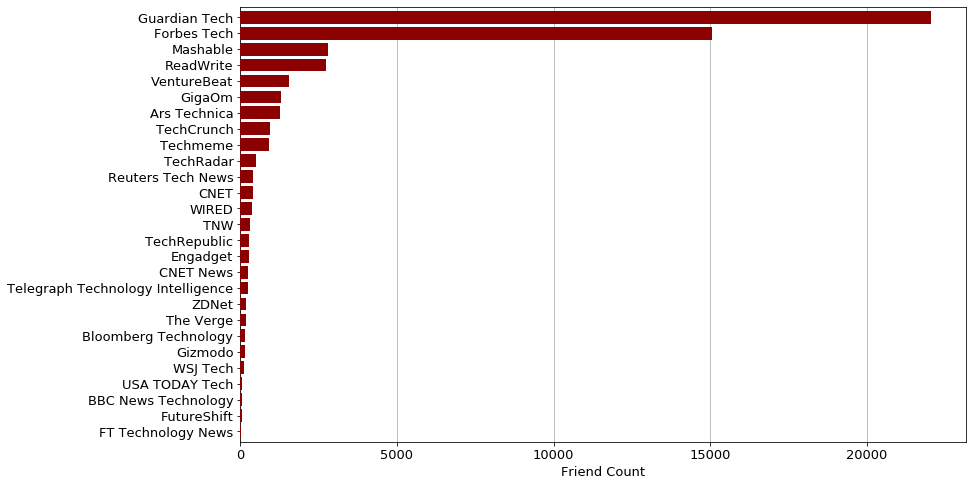

In [14]:
# get a sorted list by friends
friend_counts = df["friends_count"].sort_values()
# draw the plot
ax = friend_counts.plot( kind="barh", color="darkred", figsize=(13,8), width=0.8, fontsize=13, zorder=3 )
ax.set_xlabel("Friend Count", fontsize=13)
ax.set_ylabel(None)
ax.set_xlim(0)
ax.xaxis.grid();

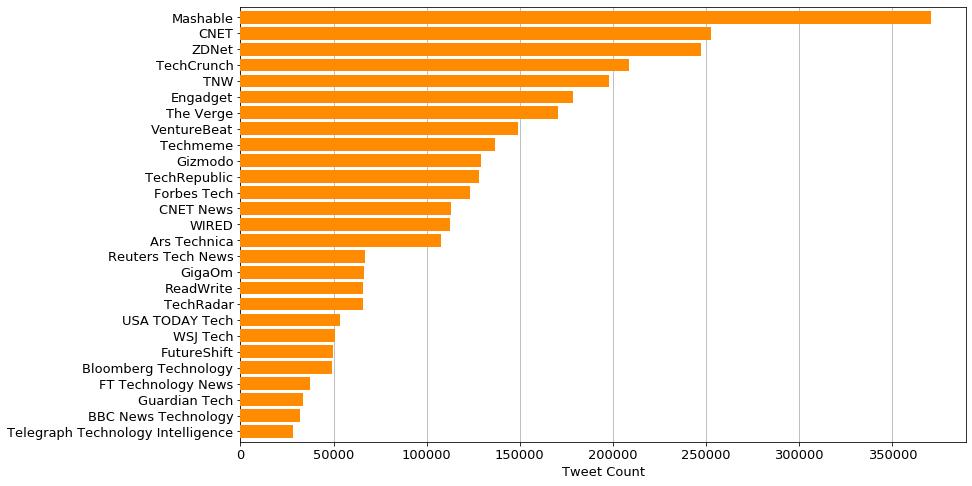

In [15]:
# get a sorted list by number of tweets (statuses)
tweet_counts = df["statuses_count"].sort_values()
# draw the plot
ax = tweet_counts.plot( kind="barh", color="darkorange", figsize=(13,8), width=0.8, fontsize=13, zorder=3 )
ax.set_xlabel("Tweet Count", fontsize=13)
ax.set_ylabel(None)
ax.set_xlim(0)
# disable scientific notation for numbers
plt.ticklabel_format(style='plain', axis='x')
ax.xaxis.grid();

In [16]:
df[["created_at","screen_name"]].sort_values(by="created_at")

,created_at,screen_name
name,,
BBC News Technology,2007-01-10 12:41:22,bbctech
Ars Technica,2007-01-28 01:58:49,arstechnica
TechCrunch,2007-03-07 01:27:09,techcrunch
Techmeme,2007-03-07 07:10:46,techmeme
CNET News,2007-03-07 22:24:21,cnetnews
Mashable,2007-03-12 01:28:01,mashable
WIRED,2007-03-17 09:57:25,wired
Gizmodo,2007-03-29 20:40:39,gizmodo
GigaOm,2007-03-29 21:05:08,gigaom


In [17]:
df[["last_tweet_date","screen_name","last_tweet"]].sort_values(by="last_tweet_date", ascending=False)

,last_tweet_date,screen_name,last_tweet
name,,,
Mashable,2020-02-20 15:37:00,mashable,"This reusable notepad has erasable paper, whic..."
USA TODAY Tech,2020-02-20 15:36:29,usatodaytech,Those foldable smartphones are just the beginn...
Techmeme,2020-02-20 15:36:28,techmeme,US blames Russian agency GRU's Main Center for...
The Verge,2020-02-20 15:34:28,verge,T-Mobile’s OnePlus 7T Pro 5G McLaren is gettin...
CNET,2020-02-20 15:32:36,cnet,"With ElectionGuard, Microsoft hopes to make ha..."
Engadget,2020-02-20 15:31:57,engadget,Google parent Alphabet is pruning its 'other b...
ZDNet,2020-02-20 15:30:33,zdnet,Cisco critical bug: Static password in Smart S...
Bloomberg Technology,2020-02-20 15:29:55,technology,RT @markgurman: New story: Apple is considerin...
TechRepublic,2020-02-20 15:25:40,techrepublic,Using Excel's Find and Mid to extract a substr...


# Follower Network

**Network Construction**

A **Twitter follower network** consists of all follower-followee relations between a set of Twitter users. Once we have collected follower data from Twitter, we create a directed network with edges, where the source is the follower user and the target is the user being followed (the followee).

In [18]:
g = nx.DiGraph()
for i,row in df.iterrows():
        g.add_node(row["screen_name"])

In [19]:
g.number_of_nodes()

27

In [20]:
filename = 'friendships.csv'
follow_df = pd.read_csv(filename)  #Reading the file 

In [21]:
follow_df

,arstechnica\tbbctech
0,forbestech\tarstechnica
1,mashable\tarstechnica
2,rww\tarstechnica
3,arstechnica\ttechmeme
4,technology\tarstechnica
...,...
149,zdnet\ttechrepublic
150,techrepublic\tzdnet
151,telegraphtech\twired
152,usatodaytech\tverge


In [22]:
follow_df.rename(columns = {'arstechnica\tbbctech':'follower'}, inplace = True) # Renaming the column and adding that particular edge manually later

follow_df[['First','Last']] = follow_df.follower.str.split("\t", expand=True)
follow_df

,follower,First,Last
0,forbestech\tarstechnica,forbestech,arstechnica
1,mashable\tarstechnica,mashable,arstechnica
2,rww\tarstechnica,rww,arstechnica
3,arstechnica\ttechmeme,arstechnica,techmeme
4,technology\tarstechnica,technology,arstechnica
...,...,...,...
149,zdnet\ttechrepublic,zdnet,techrepublic
150,techrepublic\tzdnet,techrepublic,zdnet
151,telegraphtech\twired,telegraphtech,wired
152,usatodaytech\tverge,usatodaytech,verge


In [23]:
for i,rows in follow_df.iterrows():
    g.add_edge( rows["First"], rows["Last"])

In [24]:
 g.add_edge( "arstechnica", "bbctech")  # Adding the extra edge manually which was renamed earlier as it was a column header

In [25]:
g.number_of_edges()

155

In [26]:
for e in g.edges(data=True): # Printing all edges 
    print(e)

('futureshift', 'mashable', {})
('venturebeat', 'mashable', {})
('venturebeat', 'rww', {})
('cnet', 'cnetnews', {})
('cnet', 'engadget', {})
('cnet', 'gizmodo', {})
('cnet', 'mashable', {})
('cnet', 'techcrunch', {})
('cnet', 'techmeme', {})
('cnet', 'techrepublic', {})
('cnet', 'thenextweb', {})
('cnet', 'verge', {})
('cnet', 'wired', {})
('cnet', 'zdnet', {})
('reuterstech', 'cnet', {})
('reuterstech', 'cnetnews', {})
('reuterstech', 'engadget', {})
('reuterstech', 'forbestech', {})
('reuterstech', 'fttechnews', {})
('reuterstech', 'gigaom', {})
('reuterstech', 'gizmodo', {})
('reuterstech', 'guardiantech', {})
('reuterstech', 'mashable', {})
('reuterstech', 'rww', {})
('reuterstech', 'techcrunch', {})
('reuterstech', 'techmeme', {})
('reuterstech', 'technology', {})
('reuterstech', 'telegraphtech', {})
('reuterstech', 'thenextweb', {})
('reuterstech', 'usatodaytech', {})
('reuterstech', 'venturebeat', {})
('reuterstech', 'verge', {})
('reuterstech', 'wired', {})
('reuterstech', 'wsj

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


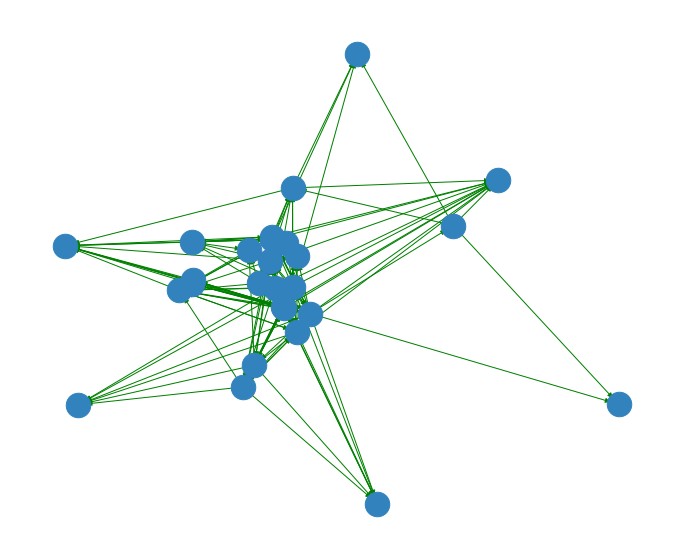

In [27]:
plt.figure(figsize=(12,10))    #creating a network 
pos = nx.layout.spectral_layout(g)

pos = nx.spring_layout(g, pos=pos, iterations=50)


nx.draw_networkx_nodes( g, pos, with_labels=True, node_size=600, node_color="#3182bd" )
nx.draw_networkx_edges( g, pos,  with_labels=True, edge_color="green", width=1)
plt.axis("off")
plt.show()

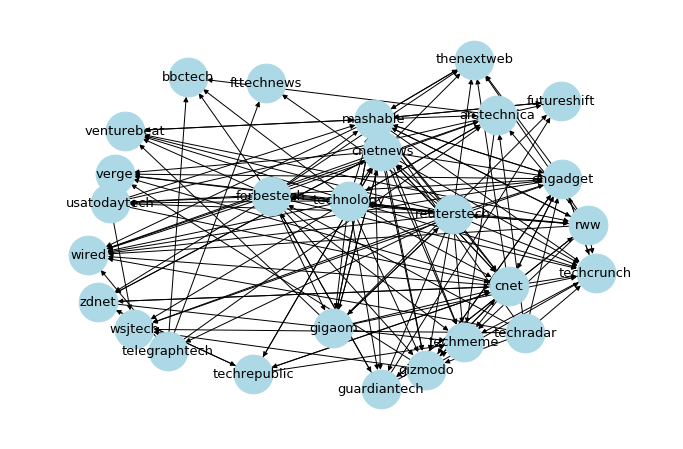

In [28]:
plt.figure(figsize=(12,8))  # Creating another network 
plt.margins(0.1,0.1)
pos = nx.spring_layout( g, k = 2.2 )
nx.draw(g, pos, with_labels = True, node_size=1500, font_size=13, node_color="lightblue")

# Follower Network

**Network Characterisation**

In [29]:
list(nx.isolates(g)) # Checking if it has any isolated nodes 

[]

In [30]:
# Printing the characteristics of the network 

print("Nodes", g.number_of_nodes() )
print("Edges", g.number_of_edges() )
print("Density %.2f" % nx.density(g) )

Nodes 27
Edges 155
Density 0.22


**Degree** 


The **degree** of a node is the number of nodes which it is connected to in the network - i.e. its number of neighbours. The *degree()* function returns the degree for all nodes in a network, or a specified node.

Influential users on Twitter are often identified by ranking them according to their number of followers - i.e. their in-degree in a follower network.

In [31]:
# Checking the degree of all individual nodes. 

in_deg = pd.Series(dict( g.in_degree() ), name="in-degree")
pd.DataFrame(in_deg).sort_values(by="in-degree", ascending=False).head(10)

,in-degree
mashable,13
techcrunch,11
techmeme,11
wired,11
engadget,9
cnet,9
gizmodo,8
verge,7
cnetnews,7
thenextweb,7


For Twitter follower networks, we might often look at the level of reciprocity, and which edges are reciprocated - i.e. - i.e. user $X$ follows user $Y$, and $Y$ follows $X$.

In [32]:
print("Reciprocity %.2f" % nx.reciprocity(g) )

Reciprocity 0.31


In [33]:
for pair in itertools.combinations(g.nodes(), r=2):
    if g.has_edge( pair[0], pair[1] ) and g.has_edge( pair[1], pair[0] ):
        print( "%s <--> %s" % pair )

futureshift <--> mashable
venturebeat <--> mashable
cnet <--> engadget
cnet <--> techrepublic
cnet <--> zdnet
cnet <--> gizmodo
cnet <--> cnetnews
reuterstech <--> technology
reuterstech <--> rww
reuterstech <--> gigaom
technology <--> arstechnica
forbestech <--> guardiantech
engadget <--> gizmodo
engadget <--> mashable
engadget <--> techcrunch
thenextweb <--> mashable
guardiantech <--> rww
techrepublic <--> zdnet
techrepublic <--> cnetnews
rww <--> mashable
zdnet <--> cnetnews
gigaom <--> mashable
gigaom <--> cnetnews
mashable <--> cnetnews


We can also construct an undirected version of the follower network, where we only keep reciprocal edges. 

In [34]:
ug1 = g.to_undirected( reciprocal=True )
ug1.number_of_nodes(), ug1.number_of_edges()

(27, 24)

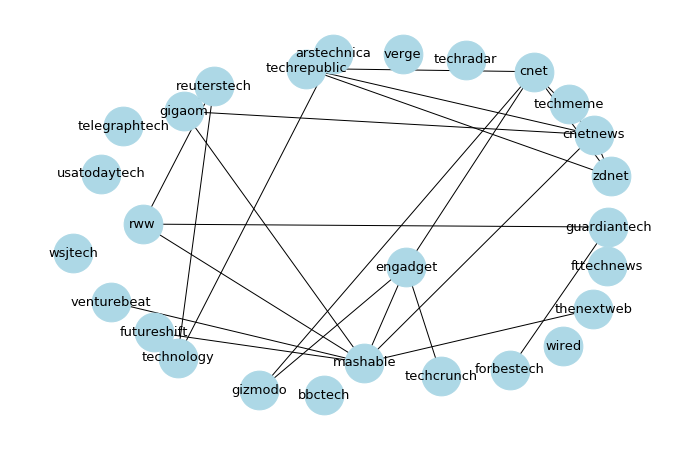

In [35]:
plt.figure(figsize=(12,8))
plt.margins(0.1,0.1)
pos = nx.spring_layout( ug1, k = 2.2 )
nx.draw(ug1, pos, with_labels = True, node_size=1500, font_size=13, node_color="lightblue")

<b> Measuring Centrality </b>

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [36]:
deg = nx.degree_centrality(g)
deg

{'verge': 0.2692307692307693,
 'futureshift': 0.19230769230769232,
 'venturebeat': 0.2692307692307693,
 'cnet': 0.7692307692307693,
 'wsjtech': 0.23076923076923078,
 'reuterstech': 0.8846153846153847,
 'technology': 0.7307692307692308,
 'telegraphtech': 0.19230769230769232,
 'usatodaytech': 0.34615384615384615,
 'techradar': 0.3076923076923077,
 'forbestech': 0.6923076923076923,
 'engadget': 0.6538461538461539,
 'fttechnews': 0.07692307692307693,
 'thenextweb': 0.3076923076923077,
 'guardiantech': 0.34615384615384615,
 'techrepublic': 0.2692307692307693,
 'rww': 0.5,
 'zdnet': 0.3076923076923077,
 'gigaom': 0.46153846153846156,
 'gizmodo': 0.5,
 'wired': 0.42307692307692313,
 'mashable': 1.0,
 'cnetnews': 0.7307692307692308,
 'techmeme': 0.42307692307692313,
 'techcrunch': 0.5,
 'arstechnica': 0.38461538461538464,
 'bbctech': 0.15384615384615385}

In [37]:
s = pd.Series(deg)
dff = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
dff.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
mashable,1.000000
reuterstech,0.884615
cnet,0.769231
technology,0.730769
cnetnews,0.730769
forbestech,0.692308
engadget,0.653846
rww,0.500000
techcrunch,0.500000
gizmodo,0.500000


Another measure, betweenness centrality can be used to find "brokers" or "bridging" nodes in a network. Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score

In [38]:
bet = nx.betweenness_centrality(g)
dff["betweenness"] = pd.Series(bet)
dff.sort_values(by="betweenness",ascending=False).head(10)

,degree_centrality,betweenness
mashable,1.000000,0.248316
reuterstech,0.884615,0.104342
arstechnica,0.384615,0.078560
cnetnews,0.730769,0.073902
cnet,0.769231,0.067432
technology,0.730769,0.066239
engadget,0.653846,0.061427
gigaom,0.461538,0.057385
rww,0.500000,0.050714
forbestech,0.692308,0.038073


Closeness centrality measures the extent to which a node is close to all other nodes in a network, either directly or indirectly.

In [39]:
close = nx.closeness_centrality(g)
dff["closeness"] = pd.Series(close)
dff.sort_values(by="closeness",ascending=False).head(10)

,degree_centrality,betweenness,closeness
mashable,1.000000,0.248316,0.549451
techmeme,0.423077,0.000000,0.547146
wired,0.423077,0.000000,0.547146
techcrunch,0.500000,0.003756,0.512821
engadget,0.653846,0.061427,0.466200
gizmodo,0.500000,0.015038,0.466200
thenextweb,0.307692,0.000000,0.427350
cnet,0.769231,0.067432,0.427350
cnetnews,0.730769,0.073902,0.427350
verge,0.269231,0.000000,0.424038


The eigenvector centrality of a node proportional to the sum of the centrality scores of its neighbours. This means that a node is important if it connected to other important nodes.

In [40]:
eig = nx.eigenvector_centrality(g)
dff["eigenvector"] = pd.Series(eig)
dff.sort_values(by="eigenvector",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector
techmeme,0.423077,0.000000,0.547146,0.371019
techcrunch,0.500000,0.003756,0.512821,0.350400
mashable,1.000000,0.248316,0.549451,0.341297
engadget,0.653846,0.061427,0.466200,0.302345
wired,0.423077,0.000000,0.547146,0.298962
thenextweb,0.307692,0.000000,0.427350,0.267289
cnet,0.769231,0.067432,0.427350,0.250137
gizmodo,0.500000,0.015038,0.466200,0.246923
verge,0.269231,0.000000,0.424038,0.225072
cnetnews,0.730769,0.073902,0.427350,0.211120


In [42]:
# Often the normalised eigenvector centrality is reported to allow for comparisons across different networks. Normalisation is done relative to the maximum value in the current network.
dff["norm_eigenvector"] = dff["eigenvector"]/max(dff["eigenvector"])
dff.sort_values(by="norm_eigenvector",ascending=False).head(10)

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
techmeme,0.423077,0.000000,0.547146,0.371019,1.000000
techcrunch,0.500000,0.003756,0.512821,0.350400,0.944427
mashable,1.000000,0.248316,0.549451,0.341297,0.919891
engadget,0.653846,0.061427,0.466200,0.302345,0.814906
wired,0.423077,0.000000,0.547146,0.298962,0.805787
thenextweb,0.307692,0.000000,0.427350,0.267289,0.720420
cnet,0.769231,0.067432,0.427350,0.250137,0.674190
gizmodo,0.500000,0.015038,0.466200,0.246923,0.665528
verge,0.269231,0.000000,0.424038,0.225072,0.606633
cnetnews,0.730769,0.073902,0.427350,0.211120,0.569028


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality. We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [43]:
dff.corr()

,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
degree_centrality,1.000000,0.808877,0.325001,0.352628,0.352628
betweenness,0.808877,1.000000,0.279369,0.235199,0.235199
closeness,0.325001,0.279369,1.000000,0.881173,0.881173
eigenvector,0.352628,0.235199,0.881173,1.000000,1.000000
norm_eigenvector,0.352628,0.235199,0.881173,1.000000,1.000000


# Reply Network

**Network Construction**

Nodes are users, directed edges denote direction of replies between users, and edge weights correspond to reply frequency.

In [44]:
fin2 = open( "tweets.jsonl", "r" )
tweets = []
# process the file line-by-line
for line in fin2.readlines():
    line = line.strip()
    # each line contains a JSON document, representing a single tweet
    tweet = json.loads(line)
    tweets.append(tweet)
fin2.close()
print("Read %d tweets" % len(tweets))

Read 13500 tweets


In [45]:
df2 = pd.DataFrame(tweets).set_index("id")
df2.head(3)

,created_at,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
id,,,,,,,,,,,,,,,,,,,,,
1228458925386801152,Fri Feb 14 23:20:06 +0000 2020,1228458925386801152,How to restore WhatsApp messages when you get ...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://thenextweb.com"" rel=""nofollow...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1228628130127962113,Sat Feb 15 10:32:27 +0000 2020,1228628130127962113,How to easily share your Wi-Fi network with iP...,False,"[0, 151]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.zdnet.com"" rel=""nofollow"">...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1222551819769073666,Wed Jan 29 16:07:22 +0000 2020,1222551819769073666,https://t.co/hRPxPfX933,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://forbes.com"" rel=""nofollow"">Bo...",NaN,None,NaN,...,False,False,False,und,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df2 = df2.drop( ['possibly_sensitive',
        'display_text_range',
        'truncated',
        'contributors',
        'coordinates', 
        'extended_entities',
        'id_str',
        'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 
        'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status',
        'source'], axis=1 ) # Dropping the extra columns 

In [47]:
df2.head(3)

,created_at,full_text,entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,user,geo,place,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
id,,,,,,,,,,,,,,,
1228458925386801152,Fri Feb 14 23:20:06 +0000 2020,How to restore WhatsApp messages when you get ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 10876852, 'id_str': '10876852', 'name':...",None,None,3,5,False,False,en,NaN
1228628130127962113,Sat Feb 15 10:32:27 +0000 2020,How to easily share your Wi-Fi network with iP...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 3819701, 'id_str': '3819701', 'name': '...",None,None,3,7,False,False,en,NaN
1222551819769073666,Wed Jan 29 16:07:22 +0000 2020,https://t.co/hRPxPfX933,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 14885549, 'id_str': '14885549', 'name':...",None,None,3,10,False,False,und,NaN


In [48]:
df3 = df2[df2['in_reply_to_screen_name'].notna()]#Dropping all rows having Nan values in the column in_reply_to_screen_name 

In [49]:
print(df2["entities"].iloc[0]) 

{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/nyjZkkrYAQ', 'expanded_url': 'https://tnw.to/JScQ6', 'display_url': 'tnw.to/JScQ6', 'indices': [75, 98]}]}


In [50]:
df3.head(2)

,created_at,full_text,entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,user,geo,place,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
id,,,,,,,,,,,,,,,
1227387547686338560,Wed Feb 12 00:22:49 +0000 2020,Poppy Northcutt was the first female engineer ...,"{'hashtags': [{'text': 'WomenInScience', 'indi...",1.227384e+18,1227383683927044097,CNET,"{'id': 30261067, 'id_str': '30261067', 'name':...",None,None,14,31,False,False,en,NaN
1227195217322872832,Tue Feb 11 11:38:34 +0000 2020,"&amp; last but not least, #Amazon said that Do...","{'hashtags': [{'text': 'Amazon', 'indices': [2...",1.227195e+18,1227195215997476864,TelegraphTech,"{'id': 19712106, 'id_str': '19712106', 'name':...",None,None,0,0,False,False,en,NaN


In [51]:
print(df3["user"].iloc[0]) #checking the attributes of the column "user"

{'id': 30261067, 'id_str': '30261067', 'name': 'CNET', 'screen_name': 'CNET', 'location': 'San Francisco', 'description': "CNET is the place to find out what's happening in tech and why it matters.", 'url': 'https://t.co/SSA14X2cTK', 'entities': {'url': {'urls': [{'url': 'https://t.co/SSA14X2cTK', 'expanded_url': 'http://www.cnet.com', 'display_url': 'cnet.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1701861, 'friends_count': 389, 'listed_count': 27358, 'created_at': 'Fri Apr 10 17:10:53 +0000 2009', 'favourites_count': 3436, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 252053, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': True, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png

In [52]:
column_names = ["id", "name", "screen_name"]
main_data = pd.DataFrame(columns = column_names)  # creating a new dataframe with fewer columns 
main_data

,id,name,screen_name


In [53]:
for i, row in df3.iterrows():  # iterating over the rows of dataframe df3

    user = json_normalize(row["user"])  
    user_row = { 
        "id":user.iloc[0]["id"],
        "in_reply_to_screen_name": row["in_reply_to_screen_name"],
       "name": user.iloc[0]["name"], 
       "screen_name": user.iloc[0]["screen_name"]
    }

    main_data = main_data.append(user_row, ignore_index=True)  #appending the rows to main_data dataframe
main_data.head(1)

,id,name,screen_name,in_reply_to_screen_name
0,30261067,CNET,CNET,CNET


In [54]:
main_data = main_data.drop(columns=['name']) #Dropping the name column
main_data

,id,screen_name,in_reply_to_screen_name
0,30261067,CNET,CNET
1,19712106,TelegraphTech,TelegraphTech
2,19712106,TelegraphTech,TelegraphTech
3,972651,mashable,mashable
4,19712106,TelegraphTech,TelegraphTech
...,...,...,...
150,1344951,WIRED,WIRED
151,112243365,futureshift,futureshift
152,112243365,futureshift,futureshift
153,972651,mashable,mashable


**OBSERVATION** - IN THIS NETWORK, WE SEE MOST OF THE REPLIES ARE TO THEIR OWN TWEETS. ONLY AROUND 28 OUT OF 155 REPLIES HAS BEEN MADE TO OTHER USERS. 

In [55]:
g2 = nx.MultiDiGraph()  # creating a Multi Directed Graph  
for i,row in main_data.iterrows():
        g2.add_node(row["in_reply_to_screen_name"]) # Adding nodes 

In [56]:
for i,rows in main_data.iterrows():
    g2.add_edge( rows["screen_name"], rows["in_reply_to_screen_name"]) #Adding all edges 

In [57]:
from collections import Counter
c = Counter(g2.edges())  # Contains frequencies of each directed edge.

for u, v, d in g2.edges(data=True):
    d['weight'] = c[u, v]  # Adding weights to every edge based on their frequency 


In [58]:
for e in g2.edges(data=True): # Printing all the edges
    print(e)


('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'CNET', {'weight': 24})
('CNET', 'techradar', {'weight': 1})
('TelegraphTech', 'TelegraphTech', {'weight': 34})
('TelegraphTech', 'TelegraphTech', {'weight': 34})
('TelegraphTech', 'TelegraphTech', {'weight': 34})
('TelegraphTech', 

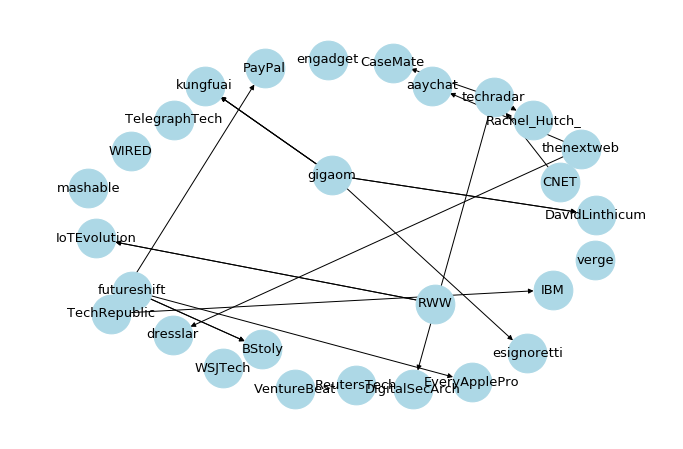

In [59]:
plt.figure(figsize=(12,8)) #Plotting a network 
plt.margins(0.1,0.1)
pos = nx.spring_layout( g2, k = 2.2 )
nx.draw(g2, pos, with_labels = True, node_size=1500, font_size=13, node_color="lightblue")

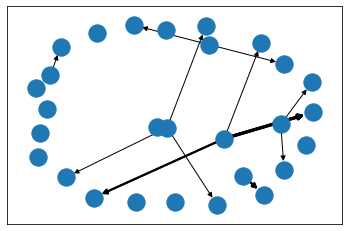

In [60]:
nx.draw_networkx(g2, with_labels = False, width=[d['weight'] for _, _, d in g2.edges(data=True)]) #drawing a graph on the basis of edge weight, edges with higher weights are more thicker

# Reply Network

**Network Characterisation**

In [61]:
# Printing the characteristics of the network 
print("Nodes", g2.number_of_nodes() )
print("Edges", g2.number_of_edges() )
print("Density %.2f" % nx.density(g2) )

Nodes 28
Edges 155
Density 0.21


In [62]:
degrees = dict( g2.degree() ) #Creating a dictionary of degrees of every user 
degrees

{'CNET': 49,
 'TelegraphTech': 68,
 'mashable': 16,
 'futureshift': 67,
 'WIRED': 48,
 'DigitalSecArch': 1,
 'techradar': 14,
 'ReutersTech': 2,
 'PayPal': 1,
 'kungfuai': 3,
 'thenextweb': 4,
 'Rachel_Hutch_': 1,
 'DavidLinthicum': 2,
 'esignoretti': 1,
 'BStoly': 2,
 'WSJTech': 6,
 'aaychat': 1,
 'verge': 4,
 'EveryApplePro': 1,
 'IoTEvolution': 2,
 'engadget': 2,
 'CaseMate': 1,
 'dresslar': 1,
 'IBM': 1,
 'VentureBeat': 2,
 'TechRepublic': 2,
 'gigaom': 6,
 'RWW': 2}

In [63]:
degree_seq = pd.Series(degrees)
degree_seq

CNET              49
TelegraphTech     68
mashable          16
futureshift       67
WIRED             48
DigitalSecArch     1
techradar         14
ReutersTech        2
PayPal             1
kungfuai           3
thenextweb         4
Rachel_Hutch_      1
DavidLinthicum     2
esignoretti        1
BStoly             2
WSJTech            6
aaychat            1
verge              4
EveryApplePro      1
IoTEvolution       2
engadget           2
CaseMate           1
dresslar           1
IBM                1
VentureBeat        2
TechRepublic       2
gigaom             6
RWW                2
dtype: int64

In [64]:
#Printing the mean and median degree of the network 
 
print('Degree range: [%d, %d]' % (degree_seq.min(), degree_seq.max() ) )
print('Mean degree: %.2f' % degree_seq.mean() )
print('Median degree: %d' % degree_seq.median() )

Degree range: [1, 68]
Mean degree: 11.07
Median degree: 2


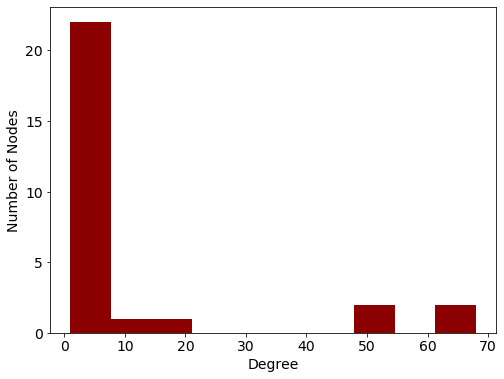

In [65]:
# generating a plot of the degree distribution for this network:
ax = degree_seq.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="darkred")
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("Degree", fontsize=14);

<b> Measuring Centrality </b>

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [66]:
deg = nx.degree_centrality(g2)
deg

{'CNET': 1.8148148148148147,
 'TelegraphTech': 2.518518518518518,
 'mashable': 0.5925925925925926,
 'futureshift': 2.4814814814814814,
 'WIRED': 1.7777777777777777,
 'DigitalSecArch': 0.037037037037037035,
 'techradar': 0.5185185185185185,
 'ReutersTech': 0.07407407407407407,
 'PayPal': 0.037037037037037035,
 'kungfuai': 0.1111111111111111,
 'thenextweb': 0.14814814814814814,
 'Rachel_Hutch_': 0.037037037037037035,
 'DavidLinthicum': 0.07407407407407407,
 'esignoretti': 0.037037037037037035,
 'BStoly': 0.07407407407407407,
 'WSJTech': 0.2222222222222222,
 'aaychat': 0.037037037037037035,
 'verge': 0.14814814814814814,
 'EveryApplePro': 0.037037037037037035,
 'IoTEvolution': 0.07407407407407407,
 'engadget': 0.07407407407407407,
 'CaseMate': 0.037037037037037035,
 'dresslar': 0.037037037037037035,
 'IBM': 0.037037037037037035,
 'VentureBeat': 0.07407407407407407,
 'TechRepublic': 0.07407407407407407,
 'gigaom': 0.2222222222222222,
 'RWW': 0.07407407407407407}

Using these scores to populate a Pandas DataFrame and display a ranking of the nodes by their degree centrality

In [67]:
s = pd.Series(deg)
dff2 = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
dff2.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
TelegraphTech,2.518519
futureshift,2.481481
CNET,1.814815
WIRED,1.777778
mashable,0.592593
techradar,0.518519
WSJTech,0.222222
gigaom,0.222222
thenextweb,0.148148
verge,0.148148


Another measure, betweenness centrality can be used to find "brokers" or "bridging" nodes in a network. Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score

In [68]:
bet = nx.betweenness_centrality(g2)
dff2["betweenness"] = pd.Series(bet)
dff2.sort_values(by="betweenness",ascending=False).head(10)

,degree_centrality,betweenness
techradar,0.518519,0.004274
CNET,1.814815,0.000000
WSJTech,0.222222,0.000000
gigaom,0.222222,0.000000
TechRepublic,0.074074,0.000000
VentureBeat,0.074074,0.000000
IBM,0.037037,0.000000
dresslar,0.037037,0.000000
CaseMate,0.037037,0.000000
engadget,0.074074,0.000000


Closeness centrality measures the extent to which a node is close to all other nodes in a network, either directly or indirectly.

In [69]:
close = nx.closeness_centrality(g2)
dff2["closeness"] = pd.Series(close)
dff2.sort_values(by="closeness",ascending=False).head(10)

,degree_centrality,betweenness,closeness
CaseMate,0.037037,0.0,0.049383
DigitalSecArch,0.037037,0.0,0.049383
Rachel_Hutch_,0.037037,0.0,0.049383
BStoly,0.074074,0.0,0.037037
EveryApplePro,0.037037,0.0,0.037037
aaychat,0.037037,0.0,0.037037
esignoretti,0.037037,0.0,0.037037
DavidLinthicum,0.074074,0.0,0.037037
dresslar,0.037037,0.0,0.037037
kungfuai,0.111111,0.0,0.037037


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality. We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [70]:
dff2.corr()

,degree_centrality,betweenness,closeness
degree_centrality,1.000000,0.028446,-0.440628
betweenness,0.028446,1.000000,0.164137
closeness,-0.440628,0.164137,1.000000


# Mention Network

**Network Construction**

A **Twitter mention network** is a weighted directed network, where nodes are users, directed edges denote direction of mentions between users, and edge weights correspond to mention frequency.

In [71]:
print(df2["entities"].iloc[0])

{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/nyjZkkrYAQ', 'expanded_url': 'https://tnw.to/JScQ6', 'display_url': 'tnw.to/JScQ6', 'indices': [75, 98]}]}


In [72]:
column_names = ["user_name", "mention_name"]
mentions = pd.DataFrame(columns = column_names)  # creating a new dataframe with fewer columns 
mentions

,user_name,mention_name


In [73]:
for i, row in df2.iterrows():  # iterating over the rows of dataframe df

    user = json_normalize(row["user"]) 
    entities = json_normalize(row["entities"])
    user_row = { 
       "user_name":user.iloc[0]["screen_name"],
       "mention_name": entities.iloc[0]["user_mentions"]
    }

    mentions = mentions.append(user_row, ignore_index=True)  #appends the row to the mentions dataframe 
mentions

,user_name,mention_name
0,thenextweb,[]
1,ZDNet,"[{'screen_name': 'the_pc_doc', 'name': 'Adrian..."
2,ForbesTech,[]
3,techradar,[]
4,RWW,[]
...,...,...
13495,ZDNet,[]
13496,futureshift,[]
13497,gigaom,"[{'screen_name': 'esignoretti', 'name': 'Enric..."
13498,WSJTech,[]


In [74]:
mentions = mentions[mentions.astype(str)['mention_name'] != '[]'] #Dropping the rows with empty mention_name
mentions

,user_name,mention_name
1,ZDNet,"[{'screen_name': 'the_pc_doc', 'name': 'Adrian..."
5,CNET,"[{'screen_name': 'alheeti_3', 'name': 'Abrar A..."
8,usatodaytech,"[{'screen_name': 'MikeSnider', 'name': 'Mike S..."
16,gigaom,"[{'screen_name': 'stoweboyd', 'name': 'Stowe B..."
20,gigaom,"[{'screen_name': 'andrewbrust', 'name': 'Andre..."
...,...,...
13482,TelegraphTech,"[{'screen_name': 'WhichUK', 'name': 'Which?', ..."
13483,thenextweb,"[{'screen_name': 'tnwevents', 'name': 'TNW Eve..."
13488,Techmeme,"[{'screen_name': 'psawers', 'name': 'Paul Sawe..."
13497,gigaom,"[{'screen_name': 'esignoretti', 'name': 'Enric..."


In [75]:
mentions.to_csv('mentions.csv')

In [76]:
column_names = ["user_name", "screen_name"]
mention_data = pd.DataFrame(columns = column_names)  # creating a new dataframe with fewer columns 
mention_data

,user_name,screen_name


In [77]:
for i, row in mentions.iterrows():  # iterating over the rows of dataframe df
    mention_list = json_normalize(row["mention_name"]) 
    mention_list["user_name"] = row["user_name"] # Storing the user_name from the dataframe mentions to a column "user_name" in mention_list
    
    mention_list = mention_list[["user_name", "screen_name"]] 
    mention_data = pd.concat([mention_data, mention_list]) # putting all data in main_data 
mention_data

,user_name,screen_name
0,ZDNet,the_pc_doc
0,CNET,alheeti_3
0,usatodaytech,MikeSnider
1,usatodaytech,peacockTV
0,gigaom,stoweboyd
...,...,...
8,gigaom,NetApp
9,gigaom,Veeam
10,gigaom,solarwinds
11,gigaom,IXIAcom


In [78]:
g3 = nx.MultiDiGraph() #Creating a Multi Directed graph with weighted edges
for i,row in mention_data.iterrows():
        g3.add_node(row["user_name"])       #Creating a bipartite network with two sets of nodes
        g3.add_node(row["screen_name"])

In [79]:
g3.number_of_nodes()

1400

In [80]:
for i,rows in mention_data.iterrows():
            g3.add_edge( rows["user_name"], rows["screen_name"]) #Adding the edges

In [81]:
from collections import Counter
c = Counter(g3.edges())  # Contains frequencies of each directed edge.

for u, v, d in g3.edges(data=True):
    d['weight'] = c[u, v]   #Adding weight to every edge


In [82]:
for e in g3.edges(data=True):  #printing all edges
    print(e)

('ZDNet', 'the_pc_doc', {'weight': 5})
('ZDNet', 'the_pc_doc', {'weight': 5})
('ZDNet', 'the_pc_doc', {'weight': 5})
('ZDNet', 'the_pc_doc', {'weight': 5})
('ZDNet', 'the_pc_doc', {'weight': 5})
('ZDNet', 'edbott', {'weight': 2})
('ZDNet', 'edbott', {'weight': 2})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'SecurityCharlie', {'weight': 8})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi', {'weight': 13})
('ZDNet', 'campuscodi',

('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', 'michaelcogley', {'weight': 17})
('TelegraphTech', '_hasanc', {'weight': 5})
('TelegraphTech', '_hasanc', {'weight': 5})
('TelegraphTech', '_hasanc', {'weight': 5})
('TelegraphTech', '_hasanc', {'weight': 5})
('TelegraphTech', '_hasanc', {'weight': 5})
('TelegraphTech', 'telebusiness', {'weight': 41})
('TelegraphTech', 'telebusiness', {'weight': 41})
('TelegraphTech', 'telebusiness', {'weight': 41})
('TelegraphTech', 'telebusiness', {'weight': 41})
('TelegraphTech', '

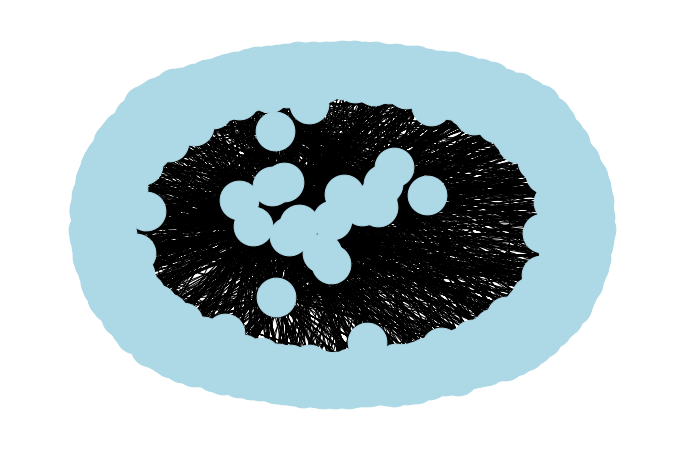

In [83]:
#plot a network 
plt.figure(figsize=(12,8))
plt.margins(0.1,0.1)
pos = nx.spring_layout( g3, k = 2.2 )
nx.draw(g3, pos, with_labels = False, node_size=1500, font_size=13, node_color="lightblue")

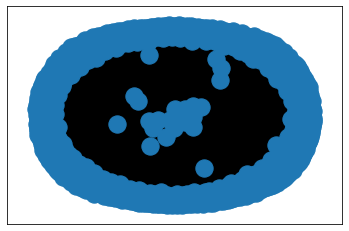

In [84]:
nx.draw_networkx(g3, with_labels = False, width=[d['weight'] for _, _, d in g3.edges(data=True)]) #Plotting according to the edge weight

# Mention Network

**Network Characterisation**

In [85]:
g3.number_of_nodes(), g3.number_of_edges()

(1400, 5244)

In [86]:
# Printing the characteristics of the network 
print("Nodes", g3.number_of_nodes() )
print("Edges", g3.number_of_edges() )
print("Density %.2f" % nx.density(g3) )

Nodes 1400
Edges 5244
Density 0.00


In [87]:
in_deg = pd.Series(dict( g3.in_degree() ), name="in-degree")
pd.DataFrame(in_deg).sort_values(by="in-degree", ascending=False).head(10)

,in-degree
esignoretti,91
napilopez,74
byronreese,70
IndianIdle,63
Kyle_L_Wiggers,62
DavidLinthicum,59
jonno,58
gigaom,56
Forbes,55
andrewbrust,51


We could focus on a single ego network, to look at other mentions that are being used around a given mention.

In [88]:
ego_node = "gigaom"
eg = nx.ego_graph(g3, ego_node)
eg.number_of_nodes(), eg.number_of_edges()

(271, 1455)

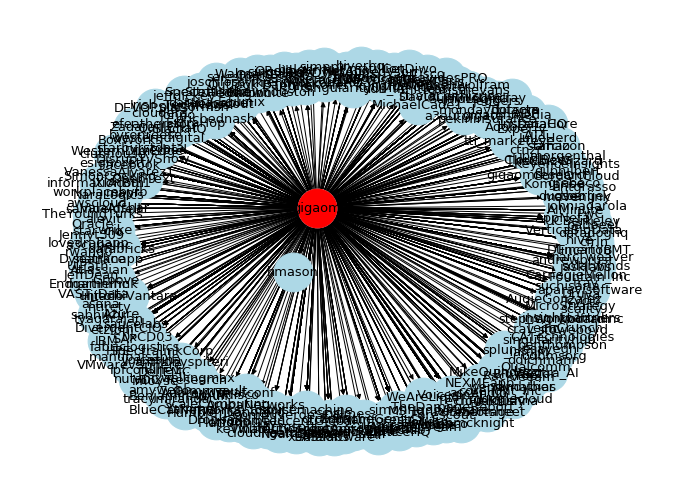

In [89]:
plt.figure(figsize=(12,9))
plt.margins(0.1,0.1)
pos = nx.spring_layout( eg )
nx.draw(eg, pos, with_labels = True, node_size=1500, font_size=13, node_color="lightblue")
# add the ego node in a different colour
nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], with_labels=True, font_size=13, 
                       node_size=1500, node_color="red");

<b> Measuring Centrality </b>

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [90]:
deg = nx.degree_centrality(g3)
deg

{'ZDNet': 0.10721944245889922,
 'the_pc_doc': 0.0035739814152966403,
 'CNET': 0.058613295210864905,
 'alheeti_3': 0.0035739814152966403,
 'usatodaytech': 0.07576840600428877,
 'MikeSnider': 0.007147962830593281,
 'peacockTV': 0.0028591851322373124,
 'gigaom': 1.0800571837026447,
 'stoweboyd': 0.03359542530378842,
 'salesforce': 0.0007147962830593281,
 'Azure': 0.0007147962830593281,
 'hive': 0.0021443888491779846,
 'OpenText': 0.0007147962830593281,
 'Carbonite': 0.0007147962830593281,
 'simpplr': 0.0007147962830593281,
 'andrewbrust': 0.036454610436025735,
 'thenextweb': 0.2537526804860615,
 'mrgreene1977': 0.008577555396711938,
 'VentureBeat': 0.27090779127948533,
 'kharijohnson': 0.015725518227305217,
 'InfoSecHotSpot': 0.0028591851322373124,
 'jeffersongraham': 0.007862759113652609,
 'Techmeme': 0.28591851322373124,
 'kadhimshubber': 0.0007147962830593281,
 'TelegraphTech': 0.2794853466761973,
 'davidgmillward': 0.0007147962830593281,
 'RWW': 0.19156540385989992,
 'LeifJohnson': 0.

In [91]:
s = pd.Series(deg)
dff3 = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
dff3.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
gigaom,1.080057
TechCrunch,0.299500
Techmeme,0.285919
TelegraphTech,0.279485
ForbesTech,0.278771
VentureBeat,0.270908
thenextweb,0.253753
RWW,0.191565
arstechnica,0.176555
ZDNet,0.107219


In [92]:
bet = nx.betweenness_centrality(g3)
dff3["betweenness"] = pd.Series(bet)
dff3.sort_values(by="betweenness",ascending=False).head(10)

,degree_centrality,betweenness
CNET,0.058613,0.000102
techradar,0.053610,0.000061
TechRepublic,0.058613,0.000053
TechCrunch,0.299500,0.000027
arstechnica,0.176555,0.000022
WIRED,0.091494,0.000021
verge,0.010722,0.000018
ZDNet,0.107219,0.000016
mashable,0.019299,0.000005
zoegthomas,0.000715,0.000000


In [93]:
close = nx.closeness_centrality(g3)
dff3["closeness"] = pd.Series(close)
dff3.sort_values(by="closeness",ascending=False).head(10)

,degree_centrality,betweenness,closeness
Google,0.006433,0.0,0.004575
campuscodi,0.017155,0.0,0.003574
Samsung,0.003574,0.0,0.002978
LiamT,0.012152,0.0,0.002859
jdolcourt,0.010007,0.0,0.002553
kirstenkorosec,0.008578,0.0,0.002287
lucasmtny,0.010007,0.0,0.002287
sarahintampa,0.029307,0.0,0.002287
ron_miller,0.022873,0.0,0.002287
PayPal,0.002144,0.0,0.002287


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality.
We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [94]:
dff3.corr()

,degree_centrality,betweenness,closeness
degree_centrality,1.000000,0.144490,-0.119962
betweenness,0.144490,1.000000,0.044078
closeness,-0.119962,0.044078,1.000000


# User-Hashtag Network

**Network Construction**

Bipartite network, where one set of nodes will be users from the list, and the other set of nodes will be hashtags which appear in their tweets.

In [95]:
column_names = ["id", "user_name", "hashtag"]
hashtags = pd.DataFrame(columns = column_names)  # creating a new dataframe with fewer columns 
hashtags

,id,user_name,hashtag


In [96]:
df2 = df2.reset_index()
df2.columns

Index(['id', 'created_at', 'full_text', 'entities', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'place', 'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'lang', 'retweeted_status'],
      dtype='object')

In [97]:
for i, row in df2.iterrows():  # iterating over the rows of dataframe df2

    user = json_normalize(row["user"])  
    entities = json_normalize(row["entities"])
    hashtag_row = { 
       "user_name":user.iloc[0]["screen_name"],
       "hashtag": entities.iloc[0]["hashtags"],
        "id": row["id"]
    }

    hashtags = hashtags.append(hashtag_row, ignore_index=True)  # Appending rows to hashtags dataframe
hashtags

,id,user_name,hashtag
0,1228458925386801152,thenextweb,[]
1,1228628130127962113,ZDNet,[]
2,1222551819769073666,ForbesTech,[]
3,1226687752940507136,techradar,[]
4,1205355426553966592,RWW,"[{'text': 'apps', 'indices': [121, 126]}]"
...,...,...,...
13495,1227898736963047425,ZDNet,[]
13496,1213552505507987457,futureshift,[]
13497,1192529838579552256,gigaom,"[{'text': 'TFD20', 'indices': [50, 56]}]"
13498,1184521974753779712,WSJTech,[]


In [98]:
hashtags = hashtags[hashtags.astype(str)['hashtag'] != '[]'] # Dropping all rows having empty hashtag
hashtags

,id,user_name,hashtag
4,1205355426553966592,RWW,"[{'text': 'apps', 'indices': [121, 126]}]"
5,1227387547686338560,CNET,"[{'text': 'WomenInScience', 'indices': [240, 2..."
20,1163857866543042560,gigaom,"[{'text': 'BI', 'indices': [45, 48]}, {'text':..."
25,1227361104390737930,VentureBeat,"[{'text': 'GalaxyUnpacked', 'indices': [79, 94]}]"
36,1224239850787872768,TelegraphTech,"[{'text': 'Amazon', 'indices': [100, 107]}, {'..."
...,...,...,...
13480,1197964484117254148,gigaom,"[{'text': 'DeepDiveIntoAI', 'indices': [54, 69..."
13481,1154806931384668160,gigaom,"[{'text': 'AIMinute', 'indices': [75, 84]}, {'..."
13482,1225353631039393792,TelegraphTech,"[{'text': 'Amazon', 'indices': [21, 28]}]"
13483,1227901865666449409,thenextweb,"[{'text': 'TNW2020', 'indices': [25, 33]}]"


In [99]:
column_names = ["id","user_name", "text"]
hashtag_data = pd.DataFrame(columns = column_names)  # creating a new dataframe with fewer columns 
hashtag_data

,id,user_name,text


In [100]:
for i, row in hashtags.iterrows():  # iterating over the rows of dataframe hashtags
    hashtag_list = json_normalize(row["hashtag"]) # creating a list for hashtag 
    hashtag_list["user_name"] = row["user_name"] # Storing the user_name from the dataframe hashtags to a column "user_name" in hashtag_list
    hashtag_list["id"] = row["id"]
    hashtag_list = hashtag_list[["id","user_name", "text"]] 
    hashtag_data = pd.concat([hashtag_data, hashtag_list]) # putting all data in main_data 
hashtag_data

,id,user_name,text
0,1205355426553966592,RWW,apps
0,1227387547686338560,CNET,WomenInScience
0,1163857866543042560,gigaom,BI
1,1163857866543042560,gigaom,cloud
2,1163857866543042560,gigaom,analytics
...,...,...,...
1,1154806931384668160,gigaom,AI
2,1154806931384668160,gigaom,artificialintelligence
0,1225353631039393792,TelegraphTech,Amazon
0,1227901865666449409,thenextweb,TNW2020


In [101]:
g4 = nx.MultiGraph() # Creating a Multi Directed Graph 
for i,row in hashtag_data.iterrows():
        g4.add_node(row["user_name"]) # Adding nodes to the graph 
        g4.add_node(row["text"])

In [102]:
g4.number_of_nodes()

737

In [103]:
for i,rows in hashtag_data.iterrows():
    g4.add_edge( rows["user_name"], rows["text"]) #adding edges 

In [104]:
from collections import Counter
c = Counter(g4.edges())  # Contains frequencies of each directed edge.

for u, v, d in g4.edges(data=True):
    d['weight'] = c[u, v] #adding weight to edges 


In [105]:
g4.number_of_edges()

3452

In [106]:
for e in g4.edges(data=True): #printing edges 
    print(e)

('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'apps', {'weight': 17})
('RWW', 'iPadOS13', {'weight': 1})
('RWW', 'branding', {'weight': 1})
('RWW', 'team', {'weight': 1})
('RWW', 'culture', {'weight': 1})
('RWW', 'GalaxyWatchActive2', {'weight': 1})
('RWW', 'AppleWatch5', {'weight': 1})
('RWW', 'LenovoYoga', {'weight': 1})
('RWW', 'Windows', {'weight': 2})
('RWW', 'Windows', {'weight': 2})
('RWW', 'iPhone11', {'weight': 8})
('RWW', 'iPhone11', {'weight': 8})
('RWW', 'iPhone11', {'weight': 8})
('RWW', 'iPhone11', {'weight

('gigaom', 'SIEMs', {'weight': 7})
('gigaom', 'SIEMs', {'weight': 7})
('gigaom', 'SIEMs', {'weight': 7})
('gigaom', 'SIEMs', {'weight': 7})
('gigaom', 'SIEMs', {'weight': 7})
('gigaom', 'SIEMs', {'weight': 7})
('gigaom', 'SIEMs', {'weight': 7})
('gigaom', 'internetpeering', {'weight': 6})
('gigaom', 'internetpeering', {'weight': 6})
('gigaom', 'internetpeering', {'weight': 6})
('gigaom', 'internetpeering', {'weight': 6})
('gigaom', 'internetpeering', {'weight': 6})
('gigaom', 'internetpeering', {'weight': 6})
('gigaom', 'peering', {'weight': 6})
('gigaom', 'peering', {'weight': 6})
('gigaom', 'peering', {'weight': 6})
('gigaom', 'peering', {'weight': 6})
('gigaom', 'peering', {'weight': 6})
('gigaom', 'peering', {'weight': 6})
('gigaom', 'ciospeaks', {'weight': 6})
('gigaom', 'ciospeaks', {'weight': 6})
('gigaom', 'ciospeaks', {'weight': 6})
('gigaom', 'ciospeaks', {'weight': 6})
('gigaom', 'ciospeaks', {'weight': 6})
('gigaom', 'ciospeaks', {'weight': 6})
('gigaom', 'Webinar', {'weigh

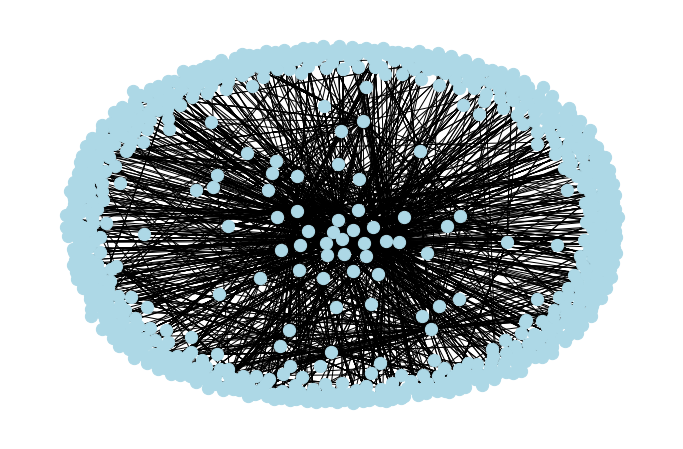

In [107]:
# Plotting the network 
plt.figure(figsize=(12,8))
plt.margins(0.1,0.1)
pos = nx.spring_layout( g4, k = 2.2 )
nx.draw(g4, pos, with_labels = False, node_size=150, font_size=13, node_color="lightblue")

# Hashtag Network

**Network Characterisation**

In [108]:
# Printing the characteristics of the network 
print("Nodes", g4.number_of_nodes() )
print("Edges", g4.number_of_edges() )
print("Density %.2f" % nx.density(g4) )


Nodes 737
Edges 3452
Density 0.01


Node Degree

The **degree** of a node is the number of nodes which it is connected to in the network - i.e. its number of neighbours. The *degree()* function returns the degree for all nodes in a network, or a specified node.

In [109]:
degrees = dict( g4.degree() )
degrees

{'RWW': 744,
 'apps': 19,
 'CNET': 129,
 'WomenInScience': 16,
 'gigaom': 1462,
 'BI': 23,
 'cloud': 76,
 'analytics': 24,
 'AI': 107,
 'VentureBeat': 44,
 'GalaxyUnpacked': 4,
 'TelegraphTech': 538,
 'Amazon': 20,
 'CloudComputing': 2,
 'FacialRecognition': 3,
 'iPadOS13': 1,
 'Facebook': 26,
 'Libra': 2,
 'cryptocurrency': 5,
 'arstechnica': 123,
 'HalfLifeAlyx': 1,
 'GalaxyS20': 15,
 'branding': 1,
 'team': 1,
 'culture': 1,
 'continuoustesting': 9,
 'enterprise': 51,
 'GalaxyWatchActive2': 1,
 'AppleWatch5': 1,
 'Google': 49,
 'YouTube': 5,
 'WSJTech': 37,
 'WSJFuture': 12,
 'MrRobot': 1,
 'Briarpatch': 1,
 'gaming': 17,
 'Apple': 86,
 'mining': 1,
 'Robotics': 1,
 'NHS': 2,
 'robots': 6,
 'VoicesinDevOps': 12,
 'podcast': 65,
 'CXOs': 11,
 'IT': 34,
 'DevOps': 45,
 'Gizmodo': 18,
 'IowaCaucuses': 3,
 'LenovoYoga': 1,
 'Podcast': 79,
 'cloudcomputing': 10,
 'voicesincloud': 6,
 'MachineLearning': 6,
 'technology': 130,
 'cybersecurity': 50,
 'data': 65,
 'VoicesinAI': 24,
 'ML': 38

In [110]:
degree_seq = pd.Series(degrees)
degree_seq

RWW                744
apps                19
CNET               129
WomenInScience      16
gigaom            1462
                  ... 
GalaxyS11            1
VentureCapital       1
BabyYoda             1
Capcom               1
TFD20                1
Length: 737, dtype: int64

In [111]:
print('Degree range: [%d, %d]' % (degree_seq.min(), degree_seq.max() ) )
print('Mean degree: %.2f' % degree_seq.mean() )
print('Median degree: %d' % degree_seq.median() )

Degree range: [1, 1462]
Mean degree: 9.37
Median degree: 1


<b> Measuring Centrality </b>

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [112]:
deg = nx.degree_centrality(g4)
deg

{'RWW': 1.0108695652173914,
 'apps': 0.025815217391304348,
 'CNET': 0.17527173913043478,
 'WomenInScience': 0.021739130434782608,
 'gigaom': 1.9864130434782608,
 'BI': 0.03125,
 'cloud': 0.10326086956521739,
 'analytics': 0.03260869565217391,
 'AI': 0.1453804347826087,
 'VentureBeat': 0.059782608695652176,
 'GalaxyUnpacked': 0.005434782608695652,
 'TelegraphTech': 0.7309782608695652,
 'Amazon': 0.02717391304347826,
 'CloudComputing': 0.002717391304347826,
 'FacialRecognition': 0.004076086956521739,
 'iPadOS13': 0.001358695652173913,
 'Facebook': 0.035326086956521736,
 'Libra': 0.002717391304347826,
 'cryptocurrency': 0.006793478260869565,
 'arstechnica': 0.1671195652173913,
 'HalfLifeAlyx': 0.001358695652173913,
 'GalaxyS20': 0.020380434782608696,
 'branding': 0.001358695652173913,
 'team': 0.001358695652173913,
 'culture': 0.001358695652173913,
 'continuoustesting': 0.012228260869565216,
 'enterprise': 0.06929347826086957,
 'GalaxyWatchActive2': 0.001358695652173913,
 'AppleWatch5': 0

In [113]:
s = pd.Series(deg)
dff4 = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
dff4.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
gigaom,1.986413
RWW,1.010870
TelegraphTech,0.730978
technology,0.176630
CNET,0.175272
arstechnica,0.167120
AI,0.145380
futureshift,0.142663
CES2020,0.131793
Apple,0.116848


In [114]:
bet = nx.betweenness_centrality(g4)
dff4["betweenness"] = pd.Series(bet)
dff4.sort_values(by="betweenness",ascending=False).head(10)

,degree_centrality,betweenness
RWW,1.010870,0.518617
gigaom,1.986413,0.399484
TelegraphTech,0.730978,0.274261
arstechnica,0.167120,0.170907
technology,0.176630,0.142673
coronavirus,0.040761,0.141024
TechRepublic,0.116848,0.066834
5G,0.035326,0.055099
CNET,0.175272,0.052943
usatodaytech,0.042120,0.044471


In [115]:
close = nx.closeness_centrality(g4)
dff4["closeness"] = pd.Series(close)
dff4.sort_values(by="closeness",ascending=False).head(10)

,degree_centrality,betweenness,closeness
RWW,1.010870,0.518617,0.416909
5G,0.035326,0.055099,0.414489
technology,0.176630,0.142673,0.409733
ArtificialIntelligence,0.028533,0.023594,0.403711
cloud,0.103261,0.023594,0.403711
IoT,0.020380,0.019295,0.393913
Microsoft,0.019022,0.019295,0.393913
CES,0.043478,0.019295,0.393913
TelegraphTech,0.730978,0.274261,0.376272
gigaom,1.986413,0.399484,0.373908


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality.
We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [116]:
dff4.corr()

,degree_centrality,betweenness,closeness
degree_centrality,1.000000,0.870818,0.186644
betweenness,0.870818,1.000000,0.246157
closeness,0.186644,0.246157,1.000000


# Hastag Co-Occurence Network

**Network Construction**

A **hashtag co-occurrence network** is a weighted undirected network, where hashtags are represented by nodes, and edges exist between pairs of hashtags if they appear together in the same tweet at least once.

In [117]:
g5 = nx.MultiGraph() #Creating a Multi Undirected Graph
for i,row in hashtag_data.iterrows():
        
        g5.add_node(row["text"]) #Adding all nodes 

In [118]:
grouped_data =  hashtag_data.groupby("id")
for tweet_id, group in grouped_data: # iterating through the rows of grouped data 
    text = group[["id", "text"]] # creating a text list for every id 
    if(len(text) > 1): # If there are more than one text, then we link all those texts 
        for i,rows in text.iterrows():
            for j,row in text.iterrows():
                g5.add_edge( rows["text"], row["text"])

In [119]:
from collections import Counter
c = Counter(g5.edges())  # Contains frequencies of each directed edge.

for u, v, d in g5.edges(data=True):
    d['weight'] = c[u, v]  #Assigns weight to edges 


In [120]:
for e in g5.edges(data=True):  #Prints all edges 
    print(e)

('apps', 'iPhone', {'weight': 4})
('apps', 'iPhone', {'weight': 4})
('apps', 'iPhone', {'weight': 4})
('apps', 'iPhone', {'weight': 4})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'apps', {'weight': 10})
('apps', 'microsoft', {'weight': 2})
('apps', 'microsoft', {'weight': 2})
('apps', 'Google', {'weight': 2})
('apps', 'Google', {'weight': 2})
('apps', 'mobile', {'weight': 2})
('apps', 'mobile', {'weight': 2})
('apps', 'google', {'weight': 2})
('apps', 'google', {'weight': 2})
('apps', 'Android', {'weight': 2})
('apps', 'Android', {'weight': 2})
('apps', 'cybersecurity', {'weight': 2})
('apps', 'cybersecurity', {'weight': 2})
('apps', 'health', {'weight': 2})
('apps', 'health', {'weight': 2})
('apps', 'DigitalTransformation', {'

('Podcast', 'artificialintelligence', {'weight': 6})
('Podcast', 'artificialintelligence', {'weight': 6})
('Podcast', 'artificialintelligence', {'weight': 6})
('Podcast', 'artificialintelligence', {'weight': 6})
('Podcast', 'artificialintelligence', {'weight': 6})
('Podcast', 'VoicesinCloud', {'weight': 4})
('Podcast', 'VoicesinCloud', {'weight': 4})
('Podcast', 'VoicesinCloud', {'weight': 4})
('Podcast', 'VoicesinCloud', {'weight': 4})
('Podcast', 'IoT', {'weight': 4})
('Podcast', 'IoT', {'weight': 4})
('Podcast', 'IoT', {'weight': 4})
('Podcast', 'IoT', {'weight': 4})
('Podcast', 'bigdata', {'weight': 4})
('Podcast', 'bigdata', {'weight': 4})
('Podcast', 'bigdata', {'weight': 4})
('Podcast', 'bigdata', {'weight': 4})
('Podcast', 'ABA', {'weight': 14})
('Podcast', 'ABA', {'weight': 14})
('Podcast', 'ABA', {'weight': 14})
('Podcast', 'ABA', {'weight': 14})
('Podcast', 'ABA', {'weight': 14})
('Podcast', 'ABA', {'weight': 14})
('Podcast', 'ABA', {'weight': 14})
('Podcast', 'ABA', {'weigh

('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES', 'MashableCES', {'weight': 40})
('MashableCES

('FaceApp', 'FaceApp', {'weight': 2})
('SpaceX', 'SpaceX', {'weight': 1})
('AWSCloud', 'AWSCloud', {'weight': 1})
('AWSCloud', 'NVMe', {'weight': 2})
('AWSCloud', 'NVMe', {'weight': 2})
('AWSCloud', 'NVME', {'weight': 2})
('AWSCloud', 'NVME', {'weight': 2})
('AWSCloud', 'AWS', {'weight': 2})
('AWSCloud', 'AWS', {'weight': 2})
('NVMe', 'NVMe', {'weight': 1})
('NVMe', 'NVME', {'weight': 2})
('NVMe', 'NVME', {'weight': 2})
('NVMe', 'AWS', {'weight': 2})
('NVMe', 'AWS', {'weight': 2})
('NVME', 'NVME', {'weight': 1})
('NVME', 'AWS', {'weight': 2})
('NVME', 'AWS', {'weight': 2})
('AWS', 'AWS', {'weight': 2})
('AWS', 'AWS', {'weight': 2})
('hyperloop', 'hyperloop', {'weight': 1})
('mentalhealth', 'mentalhealth', {'weight': 1})
('mentalhealth', 'MentalHealthAwareness', {'weight': 2})
('mentalhealth', 'MentalHealthAwareness', {'weight': 2})
('MentalHealthAwareness', 'MentalHealthAwareness', {'weight': 3})
('MentalHealthAwareness', 'MentalHealthAwareness', {'weight': 3})
('MentalHealthAwareness'

In [121]:
g5.number_of_nodes(), g5.number_of_edges()

(715, 9069)

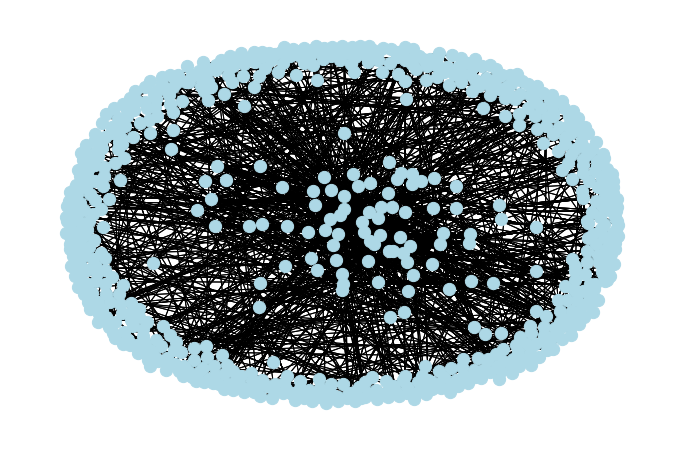

In [122]:
#Plotting the network 

plt.figure(figsize=(12,8))
plt.margins(0.1,0.1)
pos = nx.spring_layout( g5, k = 2.2 )
nx.draw(g5, pos, with_labels = False, node_size=150, font_size=13, node_color="lightblue")

# Hastag Co-Occurence Network

**Network Characterisation**

In [123]:
# Printing the characteristics of the network 
print("Nodes", g5.number_of_nodes() )
print("Edges", g5.number_of_edges() )
print("Density %.2f" % nx.density(g5) )

Nodes 715
Edges 9069
Density 0.04


In [124]:
dfg = nx.to_pandas_edgelist(g5)
dfg.sort_values(by="weight",ascending=False)

,source,target,weight
904,AI,AI,112
966,AI,AI,112
959,AI,AI,112
960,AI,AI,112
961,AI,AI,112
...,...,...,...
8670,LockSport,LockSport,1
8667,LockPicking,LockPicking,1
7251,DataScience,DataScience,1
8661,Cyberwar,Cyberwar,1


In [125]:
nx.number_connected_components(g5)

254

In [126]:
for c in nx.connected_components(g5):
    print(list(c))

['NHS', 'FunFact', 'mojo', 'deals', 'privacy', 'AR', 'Windows', 'Cyberwar', 'PewDiePie', 'voicesearch', 'proptech', 'Tesla', 'hybridcloud', 'VoicesinDataStorage', 'socialmedia', 'GoogleEarth', 'PlagueInc', 'PlayStore', 'Zuckerberg', 'wages', 'GalaxyFold2', 'ethics', 'android', 'AIEthics', 'CES', 'IT', 'SamsungUnpacked', 'password', 'Webinar', 'IIoT', 'drones', 'ArtificailIntelligence', 'InternetOfThings', 'NEON', 'HR', 'DeepDiveIntoAI', 'websites', 'construction', 'Windows10', '4k', 'edge', 'internet', 'kubernetes', 'OculusQuest', 'Unpacked', 'HPE', 'DeepLearning', 'WhatsApp', 'datalake', 'iPhone11', 'VBTransform', 'Libra', 'iPad', 'selfdrivingvehicles', 'education', 'humanrights', 'cloud', 'FacialRecognition', 'ios', 'GeneralElectionResults', 'SamsungGalaxy', 'ElectricVehicles', 'ceosecrets', 'bugbounties', 'datawarehouse', 'economics', 'ViDS', 'Pixel4', 'personalized', 'China', 'statistics', 'sales', 'TECH', 'multicloud', 'X019', 'retail', 'Security', 'Unpacked2020', 'technology', 'i

In [127]:
ego_node = "itinfrastructure"
eg = nx.ego_graph(g5, ego_node)
eg.number_of_nodes(), eg.number_of_edges()

(6, 395)

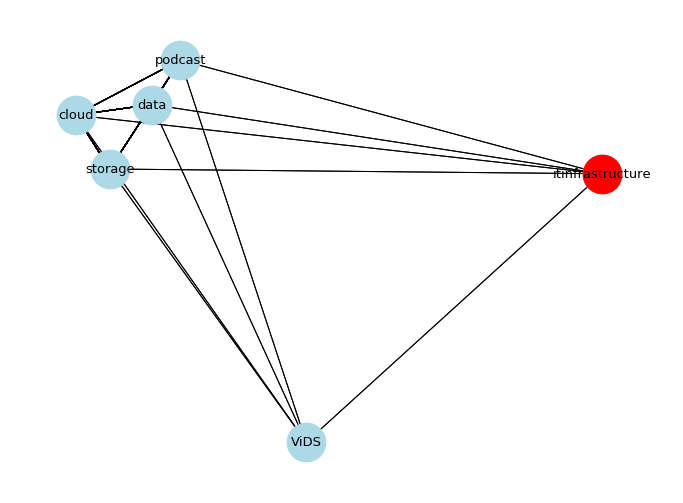

In [128]:
plt.figure(figsize=(12,9))
plt.margins(0.1,0.1)
pos = nx.spring_layout( eg )
nx.draw(eg, pos, with_labels = True, node_size=1500, font_size=13, node_color="lightblue")
# add the ego node in a different colour
nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], with_labels=True, font_size=13, 
                       node_size=1500, node_color="red");

<b> Measuring Centrality </b>

Centrality analysis allows us to identify the most important nodes in a network. The actual definition of importance depends on the nature of the network, and many different centrality measures exist. NetworkX includes implementations of the most common measures.

The most basic measure of centrality, **degree centrality**, is simply the degree of each node divided by $(n-1)$, where $n$ is the total number of nodes. The output is a dictionary, where the keys are the nodes.

In [129]:
deg = nx.degree_centrality(g5)
deg

{'apps': 0.07282913165266107,
 'WomenInScience': 0.0,
 'BI': 0.2605042016806723,
 'cloud': 0.8627450980392157,
 'analytics': 0.3165266106442577,
 'AI': 0.9831932773109244,
 'GalaxyUnpacked': 0.01680672268907563,
 'Amazon': 0.10364145658263306,
 'CloudComputing': 0.011204481792717087,
 'FacialRecognition': 0.008403361344537815,
 'iPadOS13': 0.0,
 'Facebook': 0.09523809523809523,
 'Libra': 0.01680672268907563,
 'cryptocurrency': 0.036414565826330535,
 'HalfLifeAlyx': 0.0,
 'GalaxyS20': 0.0700280112044818,
 'branding': 0.0,
 'team': 0.0056022408963585435,
 'culture': 0.0056022408963585435,
 'continuoustesting': 0.07563025210084033,
 'enterprise': 0.7394957983193278,
 'GalaxyWatchActive2': 0.0056022408963585435,
 'AppleWatch5': 0.0056022408963585435,
 'Google': 0.24089635854341737,
 'YouTube': 0.03361344537815126,
 'WSJFuture': 0.0,
 'MrRobot': 0.0056022408963585435,
 'Briarpatch': 0.0056022408963585435,
 'gaming': 0.047619047619047616,
 'Apple': 0.32212885154061627,
 'mining': 0.008403361

In [130]:
s = pd.Series(deg)
dff5 = pd.DataFrame(s,columns=["degree_centrality"])
# display the DataFrame sorted by degree centrality
dff5.sort_values(by="degree_centrality",ascending=False).head(10)

,degree_centrality
Podcast,0.991597
AI,0.983193
cloud,0.862745
data,0.834734
podcast,0.812325
enterprise,0.739496
technology,0.504202
IT,0.478992
security,0.476190
CES2020,0.436975


Another measure, betweenness centrality can be used to find "brokers" or "bridging" nodes in a network. Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score

In [131]:
bet = nx.betweenness_centrality(g5)
dff5["betweenness"] = pd.Series(bet)
dff5.sort_values(by="betweenness",ascending=False).head(10)

,degree_centrality,betweenness
technology,0.504202,0.096900
AI,0.983193,0.067062
Apple,0.322129,0.050278
cloud,0.862745,0.041946
Google,0.240896,0.038896
5G,0.173669,0.037911
data,0.834734,0.030909
ArtificialIntelligence,0.089636,0.020255
security,0.476190,0.019754
enterprise,0.739496,0.018357


Closeness centrality measures the extent to which a node is close to all other nodes in a network, either directly or indirectly.

In [132]:
close = nx.closeness_centrality(g5)
dff5["closeness"] = pd.Series(close)
dff5.sort_values(by="closeness",ascending=False).head(10)

,degree_centrality,betweenness,closeness
technology,0.504202,0.096900,0.235647
AI,0.983193,0.067062,0.229801
cloud,0.862745,0.041946,0.223766
data,0.834734,0.030909,0.215177
podcast,0.812325,0.012822,0.209259
enterprise,0.739496,0.018357,0.209053
Apple,0.322129,0.050278,0.208032
cybersecurity,0.380952,0.013850,0.207425
Google,0.240896,0.038896,0.206021
IoT,0.204482,0.013023,0.203852


As we see from the Data Frame, the order of the ranking produced by the various measures can differ, particularly in the case of betweenness centrality.
We could quantify this by looking at the correlation scores between the different measures (i.e. the columns of the Data Frame):

In [133]:
dff5.corr()

,degree_centrality,betweenness,closeness
degree_centrality,1.000000,0.631790,0.399538
betweenness,0.631790,1.000000,0.276988
closeness,0.399538,0.276988,1.000000


# Conclusion 



We have analyzed five different kinds of network that we get in Twitter:

1. Follower network (Unweighted Directed Network) - We can see a connected graph with no isolated nodes with a density of 0.22 which is comparatively higher than other networks that we are going to discuss. 

2. Reply Network (Weighted Multi Directed Network) - In this network, we see most of the replies are to their own tweets. Only around 10 out of 155 replies has been made to other users. It's almost a connected graph with very few isolated nodes with a density of 0.21. 

3. Mention Network (Weighted Multi Directed Network) - This is the most densest network we see among all as there are so many edges,partly because it is a multi graph which actually shows how many times exactly a user has been mentioned. 

4. Hashtag Network (Weighted Multi Undirected Network) - This is very similar to the mention network as it highly dense too showing exact number of times each text has been used as a hashtag by a user.

5. Hashtag Co-occurence Network (Weighted Multi Undirected Network) - Hashtags are represented by nodes, and edges exist between pairs of hashtags if they appear together in the same tweet at least once. It has a density of 0.04. 